In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib.font_manager import FontProperties

## Usage

This notebook is to visualize the output of `all_in_one_cifar10.py` and `all_in_one_imagenet.py` simply change the `df = pd.read_csv('ifgsm_imagenet_0.03_new.csv')` definition below to read_csv from your specific output file.

In [2]:
df = pd.read_csv('ifgsm_imagenet_0.03_new.csv')
print("num batches: " + str(df[df.with_ILA == True]['batch_index'].max()))

num batches: 29


In [3]:
def visualize_result(df):
    source_models = df.source_model.unique()
    target_models =  df.target_model.unique()
    attacks = df.fool_method.unique()
    metrics = ['acc_after_attack']
    for metric in metrics:

        for source_model in source_models:
            fig = plt.figure(figsize = [6*len(attacks), 4])
            shared_ax = None
            for i, attack in enumerate(attacks):

                if shared_ax == None:
                    shared_ax = plt.subplot(1,len(attacks),i+1)
                else:
                    plt.subplot(1,len(attacks),i+1, sharey=shared_ax)

                layer_indexs = df[df.source_model == source_model]['layer_index'].unique()[1:]
                layer_names = df[df.source_model == source_model]['layer_name'].unique()[1:]
                print(layer_names)
                for target_model in target_models:           
                    r = df[(df.source_model == source_model) & (df.target_model == target_model) & (df.fool_method == attack)]

                    fla = r[r.with_ILA].groupby('layer_index')
                    other = r[r.with_ILA == False]
                    xs = fla.layer_index.unique()
                    baseline = other[metric].mean()
                    fla_r = fla[metric].mean()
                    names = fla.layer_name.unique()
                    p = plt.plot(layer_indexs,  [baseline for i in xs], linestyle = '--', label = target_model)
                    plt.plot(fla_r, label =  target_model + " ILAP", color = p[0]._color)
                    if source_model != target_model and ((metric == 'fool_rate' and not(fla_r > baseline).any())or (metric == 'acc_after_attack' and not(fla_r < baseline).any())):
                        print("never perform absolutely better: " + source_model + " " + target_model)

                plt.ylim([0,75])
                plt.ylabel('Accuracy after Attack')
                plt.xlabel('Layer Index')
                fontP = FontProperties()
                fontP.set_size('small')
                
                plt.legend(ncol = 3, loc=2, prop=fontP)
            plt.show()


['conv1' 'bn1' 'layer1' 'layer2' 'layer3' 'layer4' 'fc']


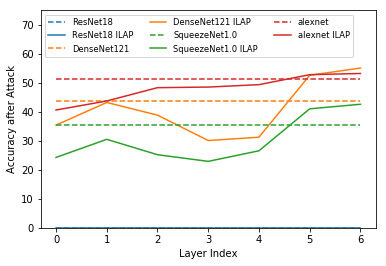

In [4]:
visualize_result(df)

In [5]:
# Original model accuracies
df.groupby(['source_model', 'target_model','fool_method'])['original_acc'].mean().reset_index()

,source_model,target_model,fool_method,original_acc
0,ResNet18,DenseNet121,ifgsm,75.000000
1,ResNet18,ResNet18,ifgsm,69.687500
2,ResNet18,SqueezeNet1.0,ifgsm,57.187500
3,ResNet18,alexnet,ifgsm,58.020833


In [6]:
baseline = df[df.with_ILA == False].groupby(['source_model', 'target_model','fool_method'])['acc_after_attack'].mean().reset_index()
baseline

,source_model,target_model,fool_method,acc_after_attack
0,ResNet18,DenseNet121,ifgsm,43.854167
1,ResNet18,ResNet18,ifgsm,0.000000
2,ResNet18,SqueezeNet1.0,ifgsm,35.416667
3,ResNet18,alexnet,ifgsm,51.458333


In [7]:
# ILA
q = df[(df.with_ILA == True)].groupby(['source_model', 'target_model','fool_method','layer_index'])['acc_after_attack'].mean().reset_index()
baseline.head()
q


,source_model,target_model,fool_method,layer_index,acc_after_attack
0,ResNet18,DenseNet121,ifgsm,0.0,35.416667
1,ResNet18,DenseNet121,ifgsm,1.0,43.229167
2,ResNet18,DenseNet121,ifgsm,2.0,38.854167
3,ResNet18,DenseNet121,ifgsm,3.0,30.104167
4,ResNet18,DenseNet121,ifgsm,4.0,31.250000
5,ResNet18,DenseNet121,ifgsm,5.0,52.604167
6,ResNet18,DenseNet121,ifgsm,6.0,55.104167
7,ResNet18,ResNet18,ifgsm,0.0,0.000000
8,ResNet18,ResNet18,ifgsm,1.0,0.000000
9,ResNet18,ResNet18,ifgsm,2.0,0.000000
